<a href="https://colab.research.google.com/github/sebavassou/aula001py_mba/blob/main/aula_02__estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import requests

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb.xlsx'
link = 'https://github.com/stefanomozart/estatistica_descritiva/raw/refs/heads/main/dados/originais/ideb/ideb_municipios2017.xlsx'


r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [18]:

import pandas

df = pandas.read_excel(f"{pasta}/{arquivo}", skiprows=9)
df.tail()

,SG_UF,COD_MUN,NO_MUNICIPIO,REDE,TAP_MED,TAP_M01,TAP_M02,TAP_M03,TAP_M04,TAP_MNS,P12,PB12_MAT17,PB12_PORT17,PAD12_17,IDEB12_17,PROJEM_2019,PROJEM_2021
11260,DF,5300108.0,Brasília,Pública,78.5,71.2,82.1,85.8,-,-,0.79197,264.96,262.76,4.344395,3.4,3.7,3.9
11261,DF,5300108.0,Brasília,Federal,87.2,80.9,92,94.6,-,-,0.887539,327.09,315.76,6.010421,5.3,5.5,5.7
11262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11263,Fonte: MEC/Inep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11264,Notas: (***): A taxa de aprovação do ensino mé...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.drop([11262, 11263, 11264], inplace=True)
df.tail(3)

,SG_UF,COD_MUN,NO_MUNICIPIO,REDE,TAP_MED,TAP_M01,TAP_M02,TAP_M03,TAP_M04,TAP_MNS,P12,PB12_MAT17,PB12_PORT17,PAD12_17,IDEB12_17,PROJEM_2019,PROJEM_2021
11259,DF,5300108.0,Brasília,Estadual,78.3,70.9,81.8,85.7,-,-,0.789517,264.01,261.96,4.319077,3.4,3.6,3.8
11260,DF,5300108.0,Brasília,Pública,78.5,71.2,82.1,85.8,-,-,0.79197,264.96,262.76,4.344395,3.4,3.7,3.9
11261,DF,5300108.0,Brasília,Federal,87.2,80.9,92,94.6,-,-,0.887539,327.09,315.76,6.010421,5.3,5.5,5.7


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         11262 non-null  object 
 1   COD_MUN       11262 non-null  float64
 2   NO_MUNICIPIO  11262 non-null  object 
 3   REDE          11262 non-null  object 
 4   TAP_MED       11262 non-null  object 
 5   TAP_M01       11262 non-null  object 
 6   TAP_M02       11262 non-null  object 
 7   TAP_M03       11262 non-null  object 
 8   TAP_M04       11262 non-null  object 
 9   TAP_MNS       11262 non-null  object 
 10  P12           11262 non-null  object 
 11  PB12_MAT17    11262 non-null  object 
 12  PB12_PORT17   11262 non-null  object 
 13  PAD12_17      11262 non-null  object 
 14  IDEB12_17     11262 non-null  object 
 15  PROJEM_2019   11262 non-null  object 
 16  PROJEM_2021   11262 non-null  object 
dtypes: float64(1), object(16)
memory usage: 1.5+ MB


In [21]:
df.REDE.value_counts()

,count
REDE,
Pública,5420
Estadual,5417
Federal,334
Municipal,91


In [22]:
# prompt: Crie um codigo que Identifique o tipo de cada variável (qualitativa nominal/ordinal, quantitativa
# discreta/continua):

from google.colab import drive
import requests
import pandas as pd

drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb.xlsx'
link = 'https://github.com/stefanomozart/estatistica_descritiva/raw/refs/heads/main/dados/originais/ideb/ideb_municipios2017.xlsx'

r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

df = pd.read_excel(f"{pasta}/{arquivo}", skiprows=9)
df.drop([11262, 11263, 11264], inplace=True)

def identify_variable_type(df):
  """Identifies the type of each variable in a Pandas DataFrame.

  Args:
    df: The Pandas DataFrame.

  Returns:
    A dictionary where keys are column names and values are variable types
    (qualitative nominal, qualitative ordinal, quantitative discrete, or
    quantitative continuous).
  """

  variable_types = {}
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
      if all(df[col].dropna().astype(int) == df[col].dropna()):  # Check for integers
          variable_types[col] = "Quantitative Discrete"
      else:
          variable_types[col] = "Quantitative Continuous"
    elif pd.api.types.is_object_dtype(df[col]):
      # Attempt to infer ordinality based on unique values that might represent an order.
      # This is not perfect, but provides a reasonable starting point.
      unique_values = df[col].unique()
      if len(unique_values) <= 10 and all(isinstance(val, str) for val in unique_values): #Check if the number of categories are few and if all are strings
        try:
          sorted(unique_values)
          variable_types[col] = "Qualitative Ordinal" # Try to order the unique values and consider it ordinal if successful
        except: #If sorting fails
          variable_types[col] = "Qualitative Nominal"
      else:
          variable_types[col] = "Qualitative Nominal"

    else:
      variable_types[col] = "Unknown" #Handles types not explicitly considered.

  return variable_types


variable_types = identify_variable_type(df)

for col, var_type in variable_types.items():
  print(f"{col}: {var_type}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SG_UF: Qualitative Nominal
COD_MUN: Quantitative Discrete
NO_MUNICIPIO: Qualitative Nominal
REDE: Qualitative Ordinal
TAP_MED: Qualitative Nominal
TAP_M01: Qualitative Nominal
TAP_M02: Qualitative Nominal
TAP_M03: Qualitative Nominal
TAP_M04: Qualitative Nominal
TAP_MNS: Qualitative Nominal
P12: Qualitative Nominal
PB12_MAT17: Qualitative Nominal
PB12_PORT17: Qualitative Nominal
PAD12_17: Qualitative Nominal
IDEB12_17: Qualitative Nominal
PROJEM_2019: Qualitative Nominal
PROJEM_2021: Qualitative Nominal


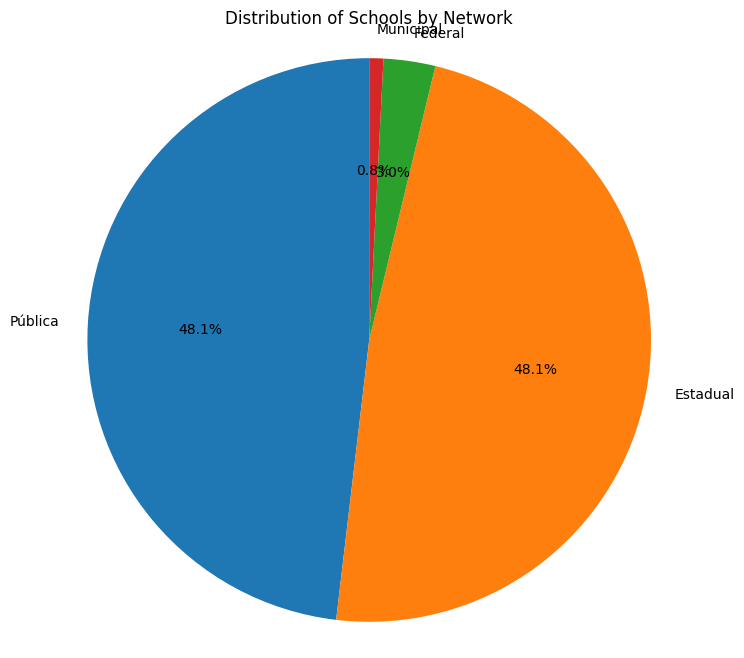

In [25]:
# prompt: Exiba um grafico de area da variavel REDE, pode ser pizza

import matplotlib.pyplot as plt

# Count occurrences of each value in the 'REDE' column
rede_counts = df['REDE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(rede_counts, labels=rede_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Schools by Network')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


TypeError: '<=' not supported between instances of 'float' and 'str'

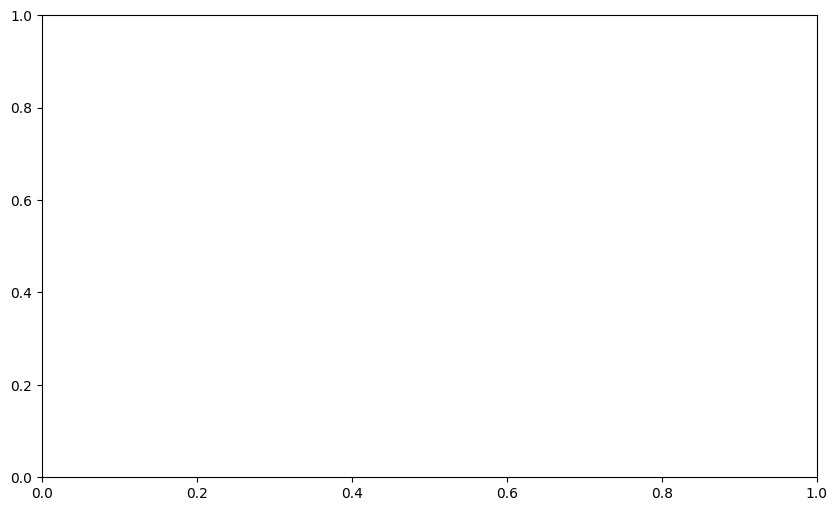

In [29]:
# prompt: Exiba um histograma da variavel IDEB12_17

import matplotlib.pyplot as plt
# Assuming 'IDEB12_17' is a numerical column in your DataFrame 'df'.
plt.figure(figsize=(10, 6))
plt.hist(df['IDEB12_17'], bins=20, edgecolor='black')  # Adjust 'bins' for desired granularity
plt.xlabel('IDEB12_17')
plt.ylabel('Frequency')
plt.title('Histogram of IDEB12_17')
plt.show()
